<a href="https://colab.research.google.com/github/analyticalaq/Warehouse_and_Retail_Sales/blob/main/Warehouse_and_Retail_Sales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
# Load the uploaded CSV file
file_path = '/content/Warehouse_and_Retail_Sales.csv'
data = pd.read_csv(file_path)


In [ ]:
# Display the first few rows and basic information of the dataset
data.head()

,YEAR,MONTH,SUPPLIER,ITEM CODE,ITEM DESCRIPTION,ITEM TYPE,RETAIL SALES,RETAIL TRANSFERS,WAREHOUSE SALES
0,2020,1,REPUBLIC NATIONAL DISTRIBUTING CO,100009,BOOTLEG RED - 750ML,WINE,0.00,0.0,2.0
1,2020,1,PWSWN INC,100024,MOMENT DE PLAISIR - 750ML,WINE,0.00,1.0,4.0
2,2020,1,RELIABLE CHURCHILL LLLP,1001,S SMITH ORGANIC PEAR CIDER - 18.7OZ,BEER,0.00,0.0,1.0
3,2020,1,LANTERNA DISTRIBUTORS INC,100145,SCHLINK HAUS KABINETT - 750ML,WINE,0.00,0.0,1.0
4,2020,1,DIONYSOS IMPORTS INC,100293,SANTORINI GAVALA WHITE - 750ML,WINE,0.82,0.0,0.0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113930 entries, 0 to 113929
Data columns (total 9 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   YEAR              113930 non-null  int64  
 1   MONTH             113930 non-null  int64  
 2   SUPPLIER          113879 non-null  object 
 3   ITEM CODE         113930 non-null  object 
 4   ITEM DESCRIPTION  113930 non-null  object 
 5   ITEM TYPE         113929 non-null  object 
 6   RETAIL SALES      113928 non-null  float64
 7   RETAIL TRANSFERS  113929 non-null  float64
 8   WAREHOUSE SALES   113929 non-null  float64
dtypes: float64(3), int64(2), object(4)
memory usage: 7.8+ MB


In [ ]:
# Check for missing values
missing_values = data.isnull().sum()

In [ ]:
# Display missing values by column
missing_values

,0
YEAR,0
MONTH,0
SUPPLIER,51
ITEM CODE,0
ITEM DESCRIPTION,0
ITEM TYPE,1
RETAIL SALES,2
RETAIL TRANSFERS,1
WAREHOUSE SALES,1


In [ ]:
# Fill missing values
data['SUPPLIER'].fillna('Unknown', inplace=True)


In [ ]:
data['ITEM TYPE'].fillna('Unknown', inplace=True)


In [ ]:
data['RETAIL SALES'].fillna(0, inplace=True)

<ipython-input-10-3061a8815e08>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['RETAIL SALES'].fillna(0, inplace=True)


In [ ]:

# Verify that there are no missing values left
missing_values_after_cleaning = data.isnull().sum()
missing_values_after_cleaning

,0
YEAR,0
MONTH,0
SUPPLIER,0
ITEM CODE,0
ITEM DESCRIPTION,0
ITEM TYPE,0
RETAIL SALES,0
RETAIL TRANSFERS,1
WAREHOUSE SALES,1


In [ ]:
# Summary statistics for numerical columns
summary_statistics = data.describe()

In [ ]:
# Count unique values in categorical columns
item_type_counts = data['ITEM TYPE'].value_counts()


In [ ]:
supplier_counts = data['SUPPLIER'].value_counts()

In [ ]:
# Aggregated sales data by year and month
monthly_sales = data.groupby(['YEAR', 'MONTH'])[['RETAIL SALES', 'RETAIL TRANSFERS', 'WAREHOUSE SALES']].sum().reset_index()


In [ ]:
summary_statistics, item_type_counts, supplier_counts.head(10), monthly_sales.head(10)

(                YEAR          MONTH   RETAIL SALES  RETAIL TRANSFERS  \
 count  113930.000000  113930.000000  113930.000000     113929.000000   
 mean     2018.177592       6.802431       7.141481          6.995867   
 std         1.464948       2.789398      31.669779         30.512746   
 min      2017.000000       1.000000      -6.490000        -38.490000   
 25%      2017.000000       6.000000       0.000000          0.000000   
 50%      2017.000000       7.000000       0.320000          0.000000   
 75%      2020.000000       9.000000       3.540000          3.000000   
 max      2020.000000      12.000000    2739.000000       1990.830000   
 
        WAREHOUSE SALES  
 count    113929.000000  
 mean         26.748520  
 std         265.556618  
 min       -4996.000000  
 25%           0.000000  
 50%           1.000000  
 75%           5.000000  
 max       18317.000000  ,
 ITEM TYPE
 WINE            69458
 LIQUOR          24347
 BEER            15594
 KEGS             3608
 NO

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
import seaborn as sns

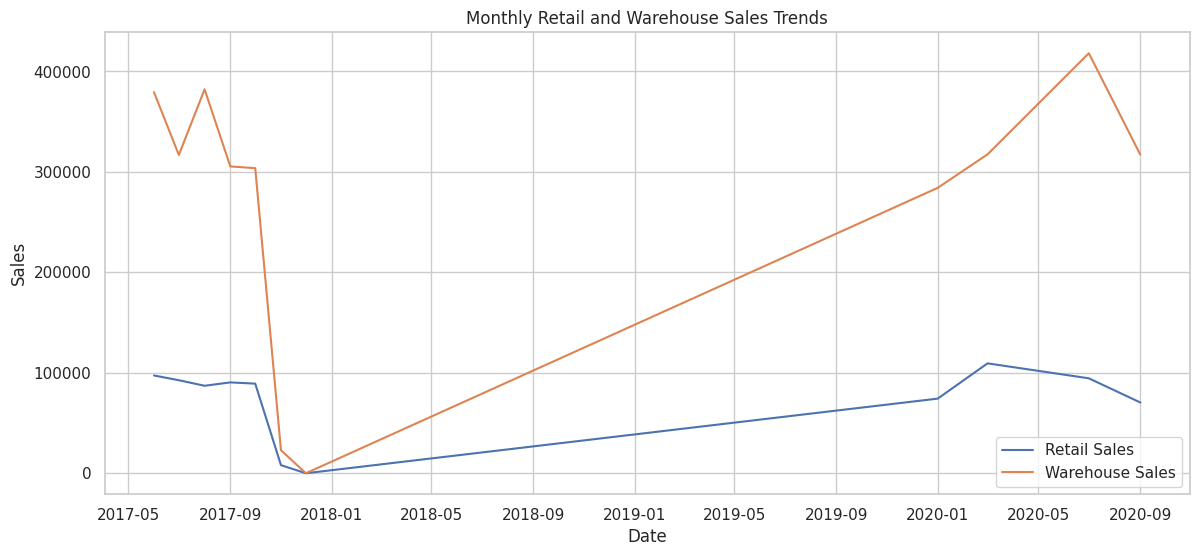

In [ ]:

# Set plot style
sns.set(style="whitegrid")

# Plot 1: Monthly Sales Trends
monthly_sales = data.groupby(['YEAR', 'MONTH'])[['RETAIL SALES', 'WAREHOUSE SALES']].sum().reset_index()
monthly_sales['DATE'] = pd.to_datetime(monthly_sales[['YEAR', 'MONTH']].assign(DAY=1))
plt.figure(figsize=(14, 6))
plt.plot(monthly_sales['DATE'], monthly_sales['RETAIL SALES'], label='Retail Sales')
plt.plot(monthly_sales['DATE'], monthly_sales['WAREHOUSE SALES'], label='Warehouse Sales')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('Monthly Retail and Warehouse Sales Trends')
plt.legend()
plt.show()



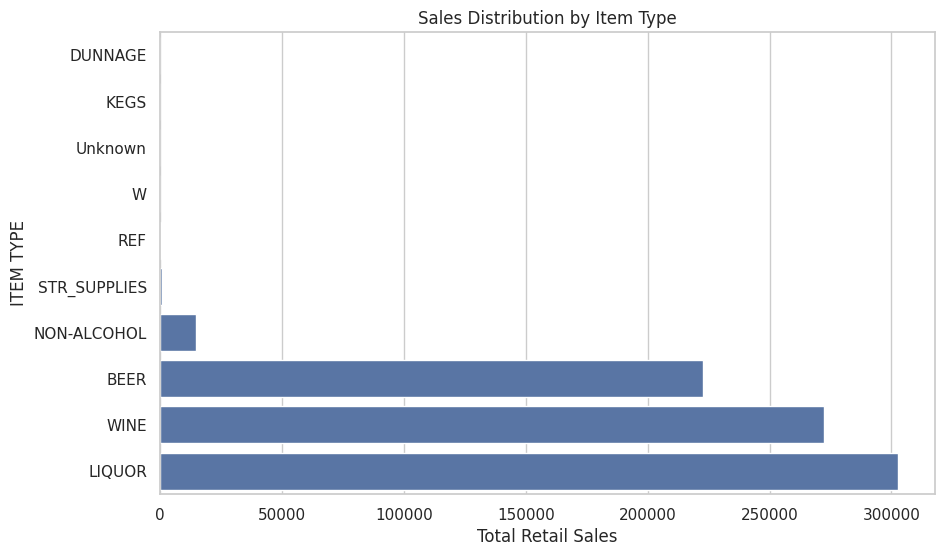

In [ ]:
# Plot 2: Sales Distribution by Item Type
item_type_sales = data.groupby('ITEM TYPE')['RETAIL SALES'].sum().sort_values()
plt.figure(figsize=(10, 6))
sns.barplot(x=item_type_sales.values, y=item_type_sales.index)
plt.xlabel('Total Retail Sales')
plt.title('Sales Distribution by Item Type')
plt.show()




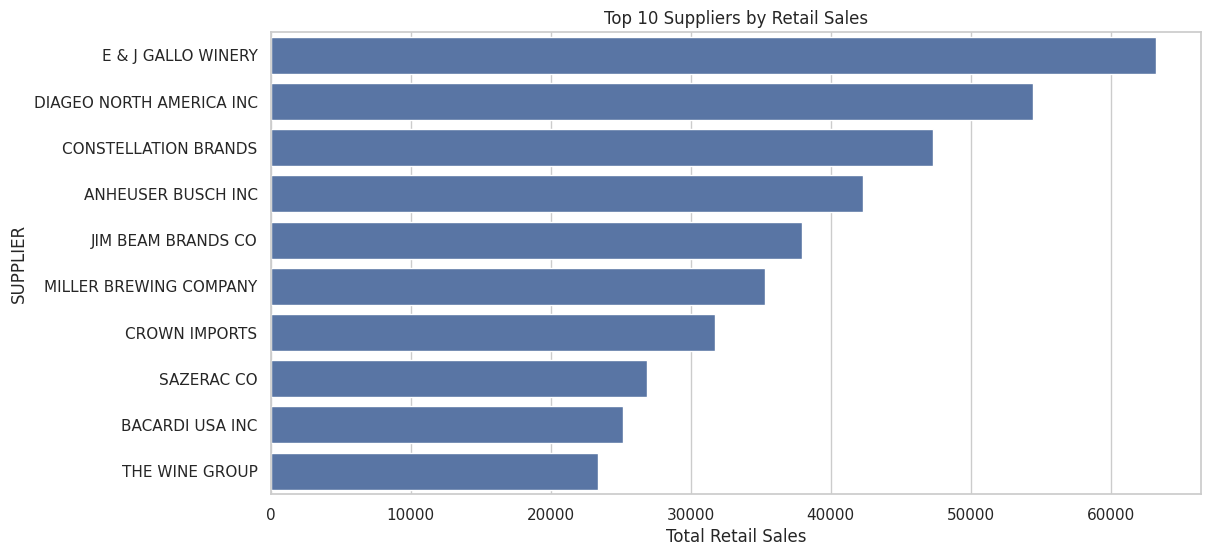

In [ ]:
# Plot 3: Top 10 Suppliers by Sales
supplier_sales = data.groupby('SUPPLIER')['RETAIL SALES'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=supplier_sales.values, y=supplier_sales.index)
plt.xlabel('Total Retail Sales')
plt.title('Top 10 Suppliers by Retail Sales')
plt.show()

In [ ]:
# Total Sales and Transfers
total_retail_sales = data['RETAIL SALES'].sum()
total_retail_transfers = data['RETAIL TRANSFERS'].sum()
total_warehouse_sales = data['WAREHOUSE SALES'].sum()

print(f"Total Retail Sales: {total_retail_sales}")
print(f"Total Retail Transfers: {total_retail_transfers}")
print(f"Total Warehouse Sales: {total_warehouse_sales}")



Total Retail Sales: 813628.9699999999
Total Retail Transfers: 797032.16
Total Warehouse Sales: 3047432.119999999


In [ ]:
# Sales by Year
yearly_sales = data.groupby('YEAR')[['RETAIL SALES', 'WAREHOUSE SALES']].sum()
print("Yearly Sales Summary:\n", yearly_sales)




Yearly Sales Summary:
       RETAIL SALES  WAREHOUSE SALES
YEAR                               
2017     464888.39       1710568.05
2020     348740.58       1336864.07


In [ ]:
# Average Sales per Item Type
avg_sales_per_item_type = data.groupby('ITEM TYPE')['RETAIL SALES'].mean().sort_values(ascending=False)
print("Average Sales per Item Type:\n", avg_sales_per_item_type)

Average Sales per Item Type:
 ITEM TYPE
NON-ALCOHOL     21.033476
BEER            14.272779
LIQUOR          12.436357
STR_SUPPLIES     6.119580
REF              6.012439
WINE             3.922475
DUNNAGE          0.000000
KEGS             0.000000
Unknown          0.000000
W                0.000000
Name: RETAIL SALES, dtype: float64


In [ ]:
# Correlation analysis for numerical columns
correlation_matrix = data[['RETAIL SALES', 'RETAIL TRANSFERS', 'WAREHOUSE SALES']].corr()
print("Correlation Matrix:\n", correlation_matrix)


Correlation Matrix:
                   RETAIL SALES  RETAIL TRANSFERS  WAREHOUSE SALES
RETAIL SALES          1.000000          0.944457         0.477326
RETAIL TRANSFERS      0.944457          1.000000         0.476408
WAREHOUSE SALES       0.477326          0.476408         1.000000


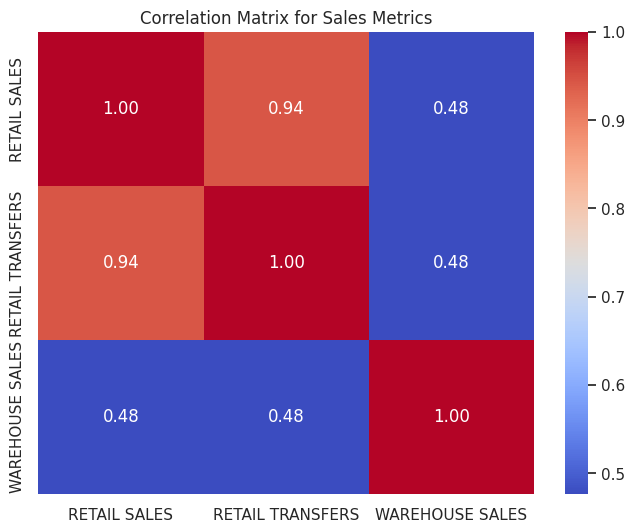

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Matrix for Sales Metrics")
plt.show()


In [ ]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Prepare monthly data
monthly_sales['DATE'] = pd.to_datetime(monthly_sales[['YEAR', 'MONTH']].assign(DAY=1))
monthly_sales.set_index('DATE', inplace=True)




In [ ]:
# Fit Exponential Smoothing model without seasonality
model_retail = ExponentialSmoothing(monthly_sales['RETAIL SALES'], trend="add").fit()
forecast_retail = model_retail.forecast(steps=12)  # Forecast next 12 months

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


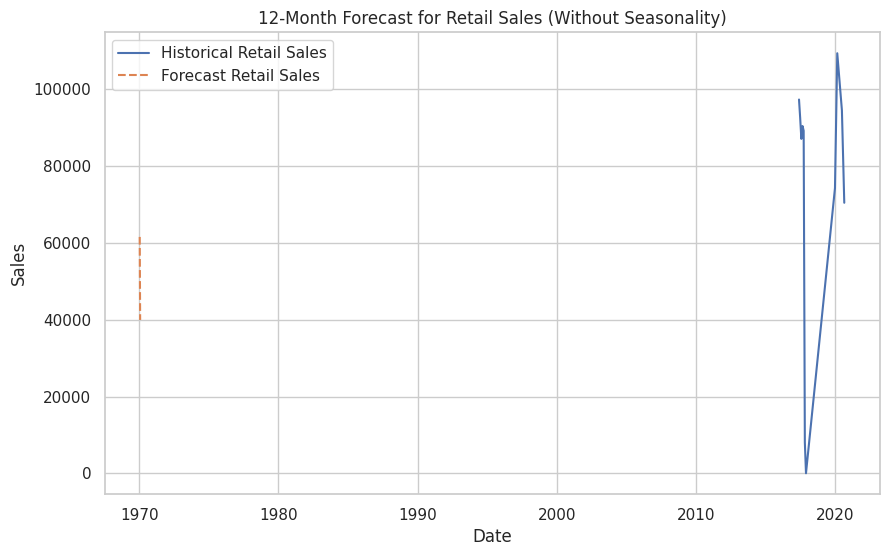

In [ ]:
# Plot forecast
plt.figure(figsize=(10, 6))
plt.plot(monthly_sales['RETAIL SALES'], label='Historical Retail Sales')
plt.plot(forecast_retail, label='Forecast Retail Sales', linestyle='--')
plt.title("12-Month Forecast for Retail Sales (Without Seasonality)")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.legend()
plt.show()

In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Fill missing values in 'RETAIL SALES' and 'WAREHOUSE SALES' with the median of each column
data['RETAIL SALES'].fillna(data['RETAIL SALES'].median(), inplace=True)
data['WAREHOUSE SALES'].fillna(data['WAREHOUSE SALES'].median(), inplace=True)

# Use 'RETAIL SALES' and 'WAREHOUSE SALES' for segmentation
segmentation_data = data[['RETAIL SALES', 'WAREHOUSE SALES']]

# Standardize the data before clustering
scaler = StandardScaler()
scaled_data = scaler.fit_transform(segmentation_data)

# Apply K-Means Clustering
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(scaled_data)

# Add cluster labels back to the dataset
data['Sales_Segment'] = clusters
print(data[['RETAIL SALES', 'WAREHOUSE SALES', 'Sales_Segment']].head())





   RETAIL SALES  WAREHOUSE SALES  Sales_Segment
0          0.00              2.0              0
1          0.00              4.0              0
2          0.00              1.0              0
3          0.00              1.0              0
4          0.82              0.0              0


<ipython-input-36-7eec82124eac>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['RETAIL SALES'].fillna(data['RETAIL SALES'].median(), inplace=True)
<ipython-input-36-7eec82124eac>:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, 

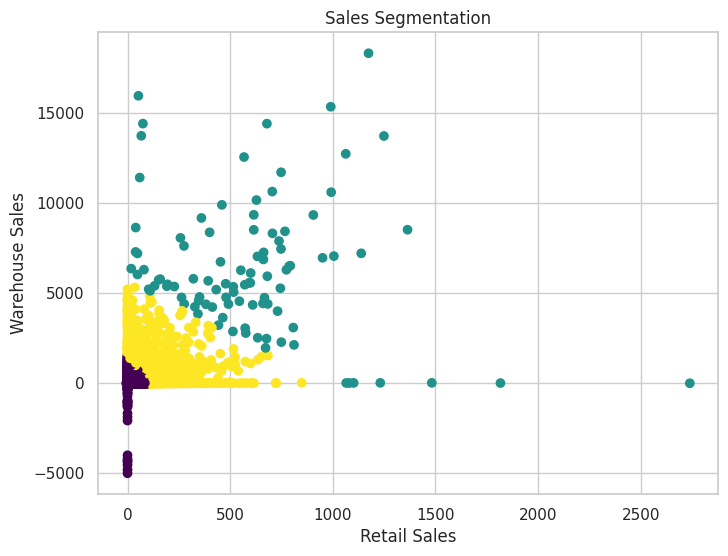

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(data['RETAIL SALES'], data['WAREHOUSE SALES'], c=data['Sales_Segment'], cmap='viridis')
plt.xlabel('Retail Sales')
plt.ylabel('Warehouse Sales')
plt.title('Sales Segmentation')
plt.show()

In [ ]:
from scipy.stats import zscore

# Calculate Z-scores for detecting anomalies in retail sales
data['Retail_Sales_Zscore'] = zscore(data['RETAIL SALES'])

# Identify anomalies (e.g., Z-score > 3 or < -3 as threshold)
anomalies = data[(data['Retail_Sales_Zscore'] > 3) | (data['Retail_Sales_Zscore'] < -3)]

# Display anomalies
print("Detected Anomalies:\n", anomalies[['YEAR', 'MONTH', 'RETAIL SALES', 'Retail_Sales_Zscore']])



Detected Anomalies:
         YEAR  MONTH  RETAIL SALES  Retail_Sales_Zscore
171     2020      1        109.97             3.246912
255     2020      1        134.61             4.024944
260     2020      1        126.97             3.783703
261     2020      1        131.13             3.915059
405     2020      1        156.47             4.715195
...      ...    ...           ...                  ...
112920  2017     11        251.82             7.725965
112921  2017     11        155.44             4.682671
113371  2017     11        208.57             6.360303
113397  2017     11        114.19             3.380162
113594  2017     11        115.33             3.416159

[1201 rows x 4 columns]


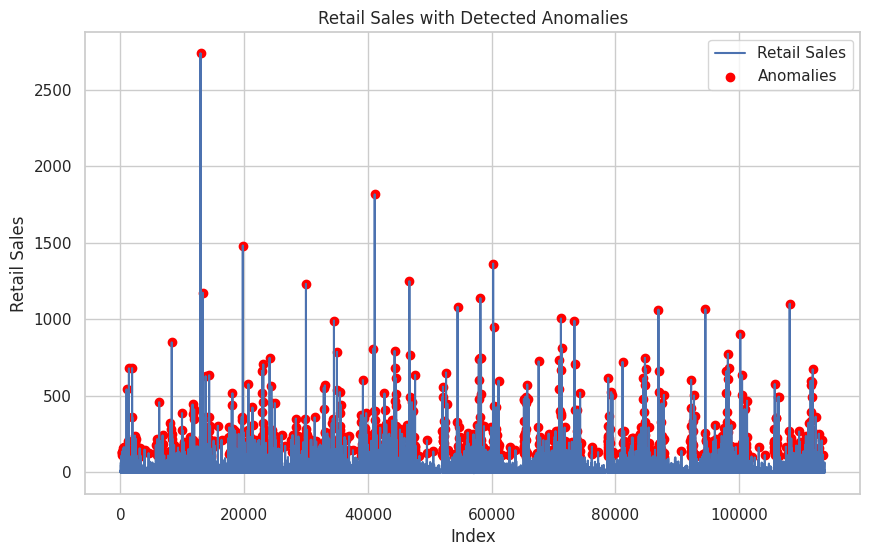

In [ ]:
# Visualize anomalies
plt.figure(figsize=(10, 6))
plt.plot(data['RETAIL SALES'], label='Retail Sales')
plt.scatter(anomalies.index, anomalies['RETAIL SALES'], color='red', label='Anomalies')
plt.xlabel('Index')
plt.ylabel('Retail Sales')
plt.title('Retail Sales with Detected Anomalies')
plt.legend()
plt.show()


In [ ]:
pip install fpdf

  Preparing metadata (setup.py) ... done
  Created wheel for fpdf: filename=fpdf-1.7.2-py2.py3-none-any.whl size=40704 sha256=11cecdf6fe406441f8852d212aed37ed9bac6dba3afe27fd19d958a3fd897300
  Stored in directory: /root/.cache/pip/wheels/f9/95/ba/f418094659025eb9611f17cbcaf2334236bf39a0c3453ea455
Successfully built fpdf


In [ ]:
import pandas as pd
from fpdf import FPDF

# Example report with FPDF library
pdf = FPDF()
pdf.add_page()
pdf.set_font("Arial", size=12)

# Add text content
pdf.cell(200, 10, txt="Sales Analysis Report", ln=True, align='C')
pdf.ln(10)

# Add summary statistics
summary_stats_text = f"Total Retail Sales: {total_retail_sales}\nTotal Retail Transfers: {total_retail_transfers}\nTotal Warehouse Sales: {total_warehouse_sales}"
pdf.multi_cell(200, 10, txt=summary_stats_text)

# Save PDF
pdf.output("Sales_Analysis_Report.pdf")


''

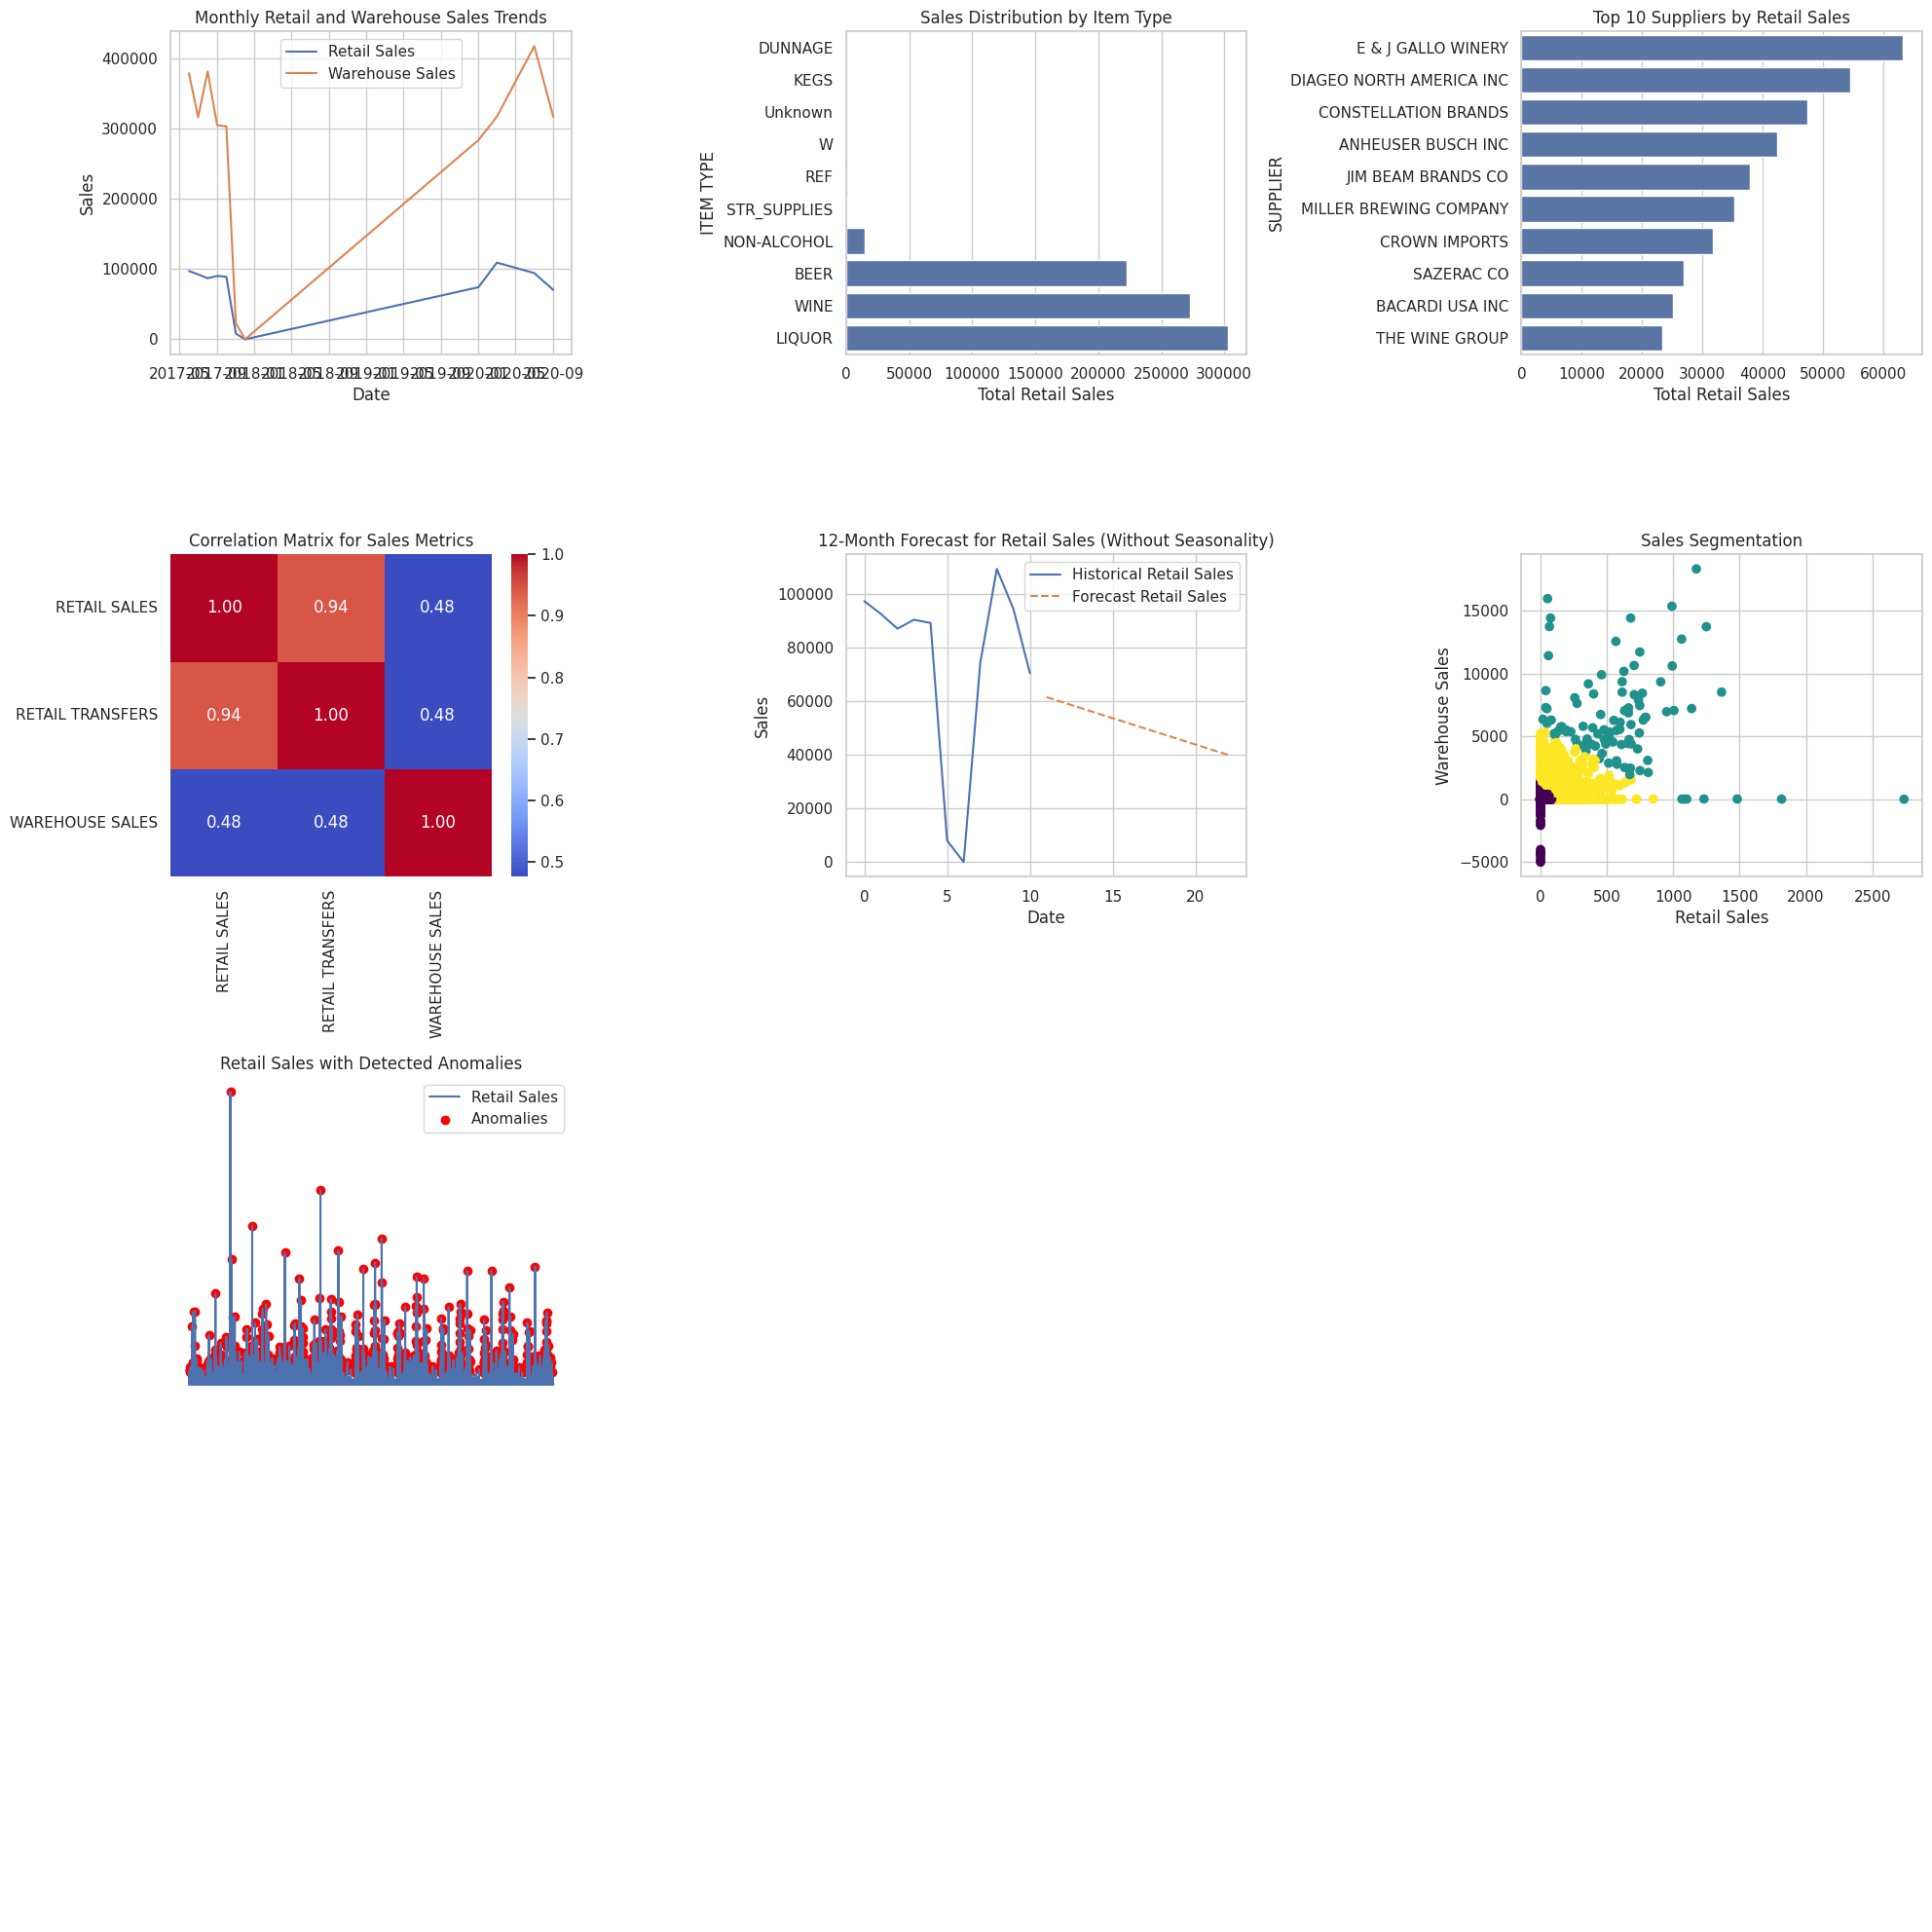

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assuming 'data' is your DataFrame and 'correlation_matrix', 'forecast_retail', 'anomalies' are calculated

# Set plot style
sns.set(style="whitegrid")

# Create a figure with 4 rows and 3 columns
fig, axs = plt.subplots(4, 3, figsize=(20, 20))

# Plot 1: Monthly Sales Trends
monthly_sales = data.groupby(['YEAR', 'MONTH'])[['RETAIL SALES', 'WAREHOUSE SALES']].sum().reset_index()
monthly_sales['DATE'] = pd.to_datetime(monthly_sales[['YEAR', 'MONTH']].assign(DAY=1))
axs[0, 0].plot(monthly_sales['DATE'], monthly_sales['RETAIL SALES'], label='Retail Sales')
axs[0, 0].plot(monthly_sales['DATE'], monthly_sales['WAREHOUSE SALES'], label='Warehouse Sales')
axs[0, 0].set_xlabel('Date')
axs[0, 0].set_ylabel('Sales')
axs[0, 0].set_title('Monthly Retail and Warehouse Sales Trends')
axs[0, 0].legend()

# Plot 2: Sales Distribution by Item Type
item_type_sales = data.groupby('ITEM TYPE')['RETAIL SALES'].sum().sort_values()
sns.barplot(x=item_type_sales.values, y=item_type_sales.index, ax=axs[0, 1])
axs[0, 1].set_xlabel('Total Retail Sales')
axs[0, 1].set_title('Sales Distribution by Item Type')

# Plot 3: Top 10 Suppliers by Sales
supplier_sales = data.groupby('SUPPLIER')['RETAIL SALES'].sum().sort_values(ascending=False).head(10)
sns.barplot(x=supplier_sales.values, y=supplier_sales.index, ax=axs[0, 2])
axs[0, 2].set_xlabel('Total Retail Sales')
axs[0, 2].set_title('Top 10 Suppliers by Retail Sales')

# Plot 4: Correlation Matrix
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', ax=axs[1, 0])
axs[1, 0].set_title("Correlation Matrix for Sales Metrics")

# Plot 5: Forecast
axs[1, 1].plot(monthly_sales['RETAIL SALES'], label='Historical Retail Sales')
axs[1, 1].plot(forecast_retail, label='Forecast Retail Sales', linestyle='--')
axs[1, 1].set_title("12-Month Forecast for Retail Sales (Without Seasonality)")
axs[1, 1].set_xlabel("Date")
axs[1, 1].set_ylabel("Sales")
axs[1, 1].legend()

# Plot 6: Sales Segmentation
axs[1, 2].scatter(data['RETAIL SALES'], data['WAREHOUSE SALES'], c=data['Sales_Segment'], cmap='viridis')
axs[1, 2].set_xlabel('Retail Sales')
axs[1, 2].set_ylabel('Warehouse Sales')
axs[1, 2].set_title('Sales Segmentation')

# Plot 7: Anomalies
axs[2, 0].plot(data['RETAIL SALES'], label='Retail Sales')
axs[2, 0].scatter(anomalies.index, anomalies['RETAIL SALES'], color='red', label='Anomalies')
axs[2, 0].set_xlabel('Index')
axs[2, 0].set_ylabel('Retail Sales')
axs[2, 0].set_title('Retail Sales with Detected Anomalies')
axs[2, 0].legend()

# Hide unused subplots
for i in range(2, 4):
    for j in range(3):
        axs[i, j].axis('off')

# Layout so plots do not overlap
fig.tight_layout()


plt.show()

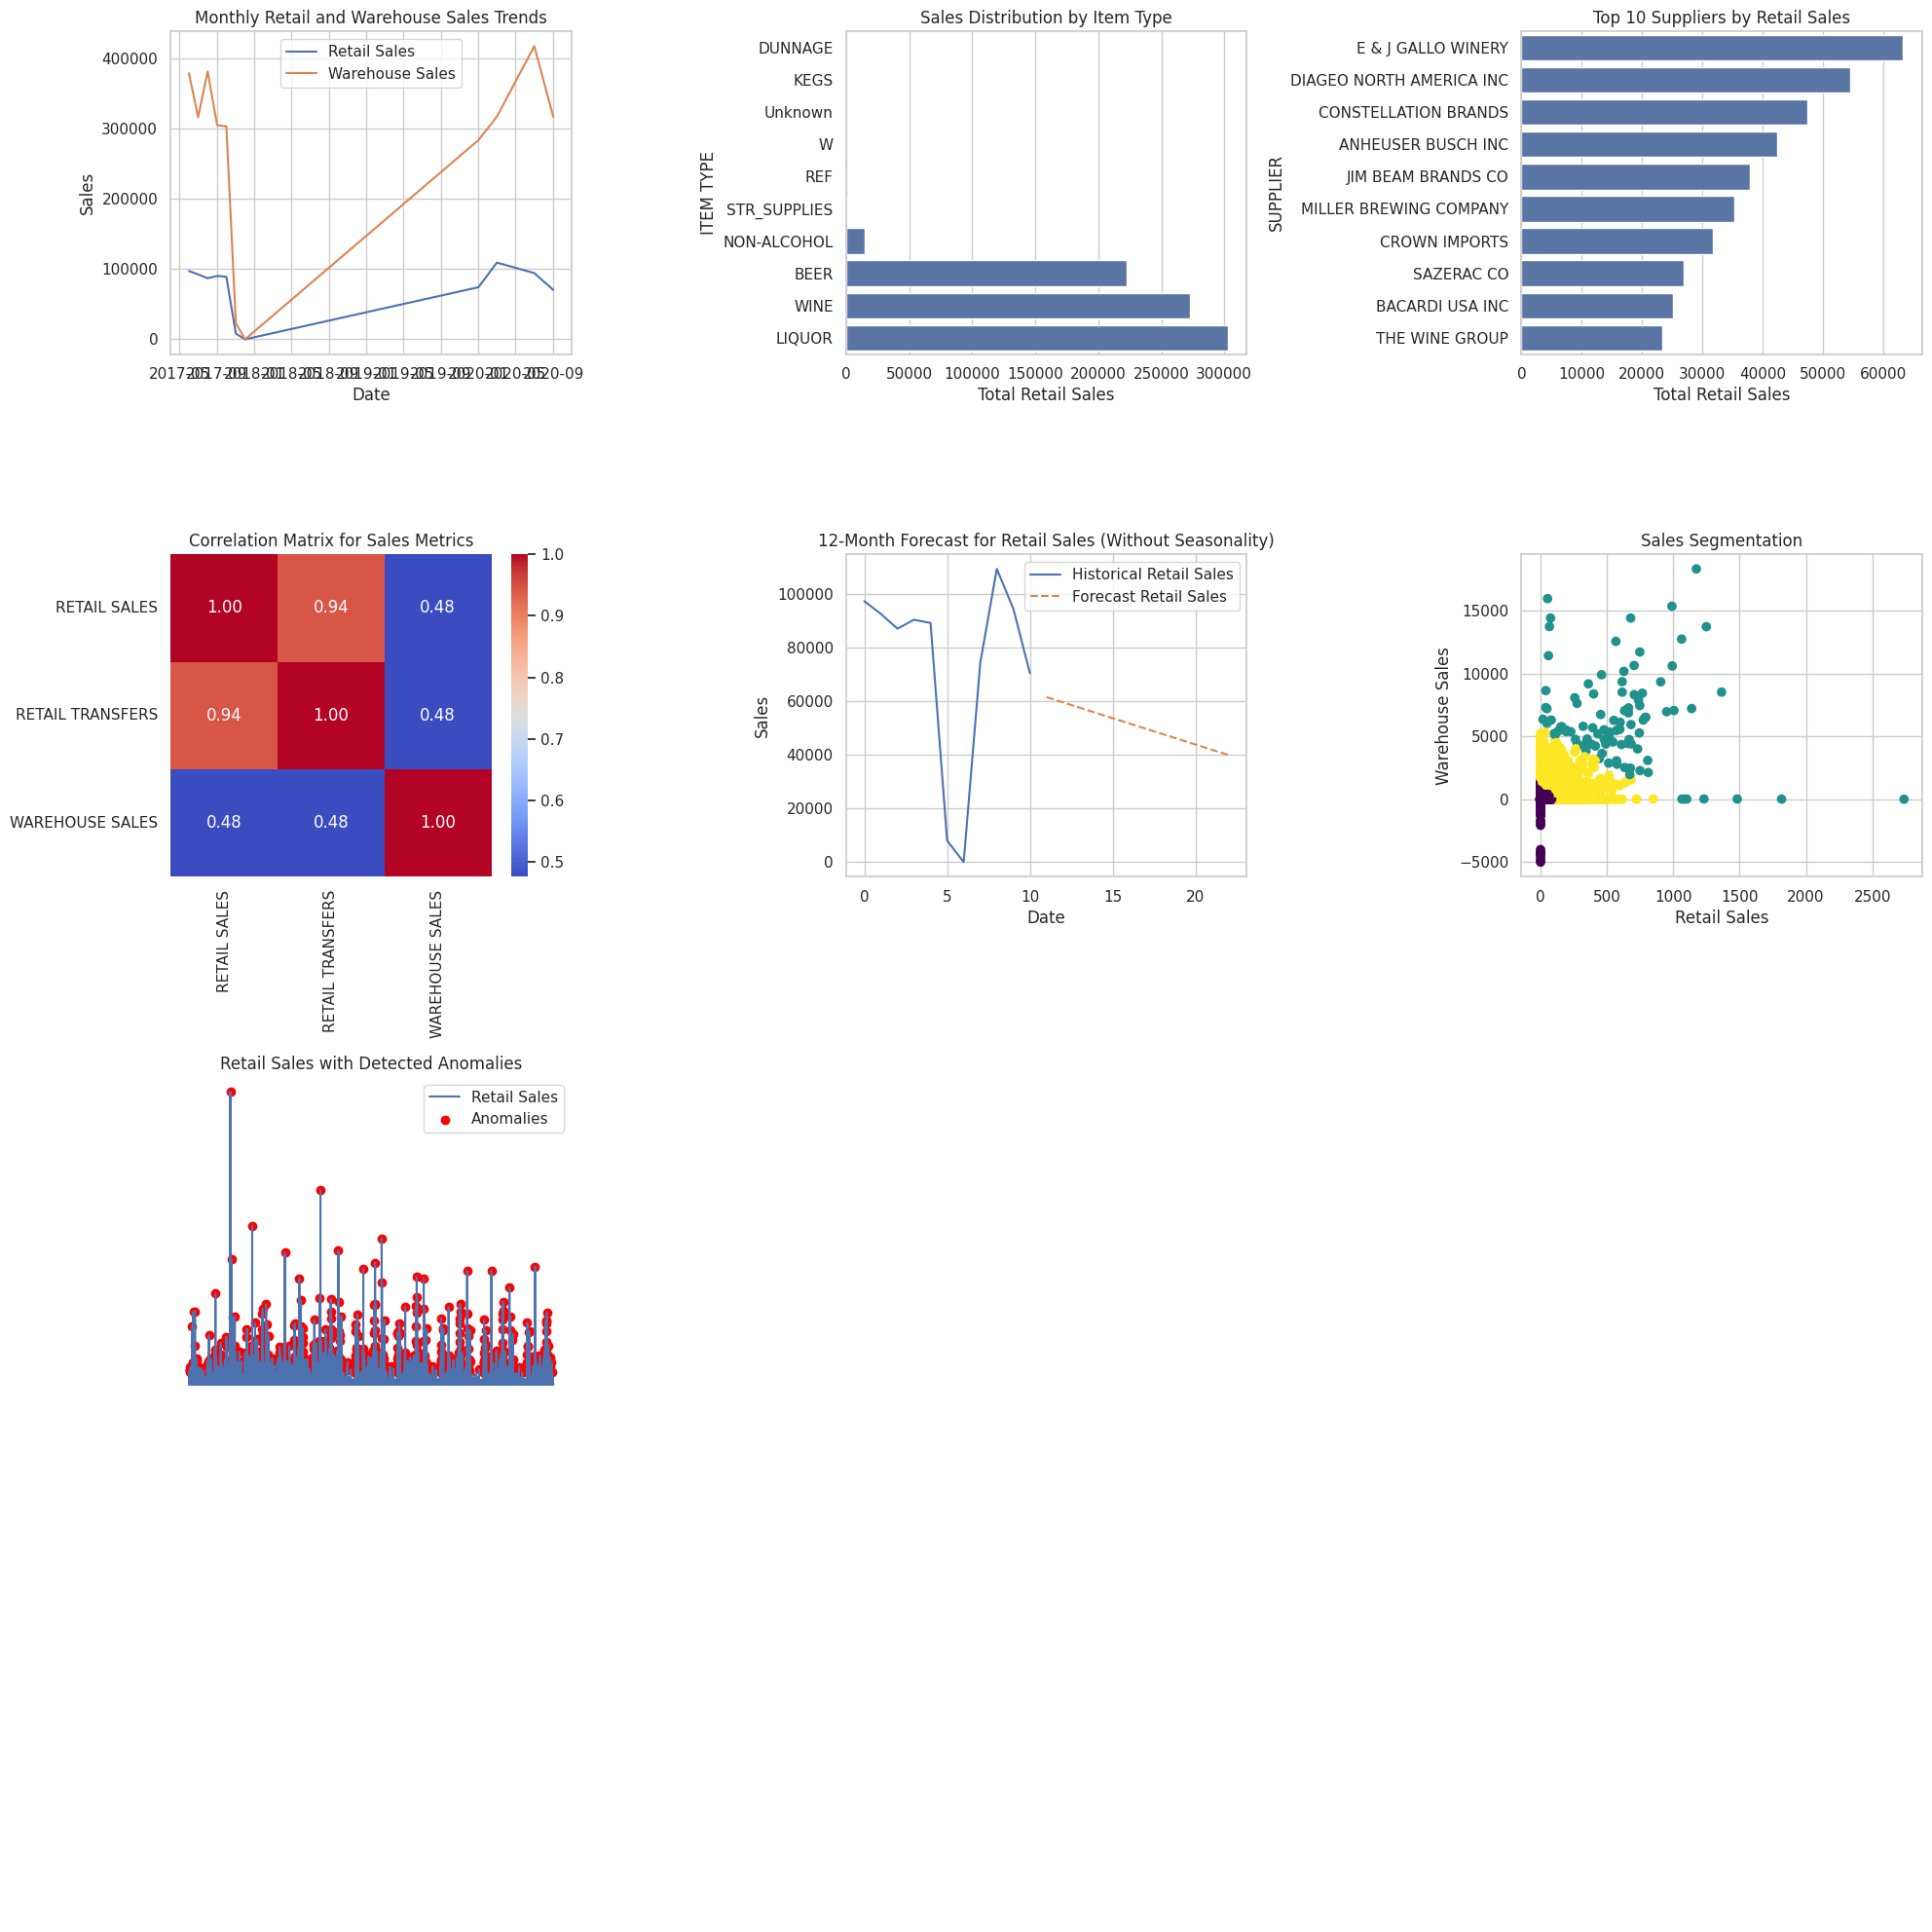

In [ ]:
# Create a figure with 4 rows and 3 columns
fig, axs = plt.subplots(4, 3, figsize=(20, 20))

# Plot 1: Monthly Sales Trends
monthly_sales = data.groupby(['YEAR', 'MONTH'])[['RETAIL SALES', 'WAREHOUSE SALES']].sum().reset_index()
monthly_sales['DATE'] = pd.to_datetime(monthly_sales[['YEAR', 'MONTH']].assign(DAY=1))
axs[0, 0].plot(monthly_sales['DATE'], monthly_sales['RETAIL SALES'], label='Retail Sales')
axs[0, 0].plot(monthly_sales['DATE'], monthly_sales['WAREHOUSE SALES'], label='Warehouse Sales')
axs[0, 0].set_xlabel('Date')
axs[0, 0].set_ylabel('Sales')
axs[0, 0].set_title('Monthly Retail and Warehouse Sales Trends')
axs[0, 0].legend()

# Plot 2: Sales Distribution by Item Type
item_type_sales = data.groupby('ITEM TYPE')['RETAIL SALES'].sum().sort_values()
sns.barplot(x=item_type_sales.values, y=item_type_sales.index, ax=axs[0, 1])
axs[0, 1].set_xlabel('Total Retail Sales')
axs[0, 1].set_title('Sales Distribution by Item Type')

# Plot 3: Top 10 Suppliers by Sales
supplier_sales = data.groupby('SUPPLIER')['RETAIL SALES'].sum().sort_values(ascending=False).head(10)
sns.barplot(x=supplier_sales.values, y=supplier_sales.index, ax=axs[0, 2])
axs[0, 2].set_xlabel('Total Retail Sales')
axs[0, 2].set_title('Top 10 Suppliers by Retail Sales')

# Plot 4: Correlation Matrix
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', ax=axs[1, 0])
axs[1, 0].set_title("Correlation Matrix for Sales Metrics")

# Plot 5: Forecast
axs[1, 1].plot(monthly_sales['RETAIL SALES'], label='Historical Retail Sales')
axs[1, 1].plot(forecast_retail, label='Forecast Retail Sales', linestyle='--')
axs[1, 1].set_title("12-Month Forecast for Retail Sales (Without Seasonality)")
axs[1, 1].set_xlabel("Date")
axs[1, 1].set_ylabel("Sales")
axs[1, 1].legend()

# Plot 6: Sales Segmentation
axs[1, 2].scatter(data['RETAIL SALES'], data['WAREHOUSE SALES'], c=data['Sales_Segment'], cmap='viridis')
axs[1, 2].set_xlabel('Retail Sales')
axs[1, 2].set_ylabel('Warehouse Sales')
axs[1, 2].set_title('Sales Segmentation')

# Plot 7: Anomalies
axs[2, 0].plot(data['RETAIL SALES'], label='Retail Sales')
axs[2, 0].scatter(anomalies.index, anomalies['RETAIL SALES'], color='red', label='Anomalies')
axs[2, 0].set_xlabel('Index')
axs[2, 0].set_ylabel('Retail Sales')
axs[2, 0].set_title('Retail Sales with Detected Anomalies')
axs[2, 0].legend()

# Hide unused subplots
for i in range(2, 4):
    for j in range(3):
        axs[i, j].axis('off')

# Layout so plots do not overlap




# Save the figure as a PDF
plt.tight_layout()
plt.savefig('dashboard_report.pdf')

plt.show()